In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
from scipy.stats import binom
from sklearn.decomposition import PCA

In [15]:
dallas = [4,1,5,5,5,1,2.5,2.5,1,3,4,4,1,4,5,4,4,4,4,4,2.5,1,1,3,1,2,3,5,2,4]
tommy = [4,1,3,1,2,3,3,4,3,4,2,1,3,4,4,2,1,1,3,2,4,3,4,2,4,3,4,3,2,3]
allen = [4,2,4,4,4,3,1,1,4,2,4,4.5,2,3,2,5,1,1,5,4,3,3,2,2,1,2,4,4,5,3]
eszter = [5,4,5,4,3,2,2,1,3,4,1,1,3,3,3,4,1,4,6,2,3,3,2,2,1,2,3,3,1,1]
elise = [5,1,5,1,1,1,5,3,4,5,4,3,4,5,5,3,1,3,3,1,4,4,3,2,1,2,2,5,3,1]
brenda = [5,3,3,4,2,2,1,3,4,4,2,3,4,4,3,4,1,2,5,1,3,3,3,2,3,3,2,3,2,2]

wines = ["Cava", "Sauvignon\nBlanc", "Riesling", "Rose", "Malbec"]
foods = ["Honey", "Kale", "Brie", "Hot Sauce", "Potato Chip", "Pickle"]

In [16]:
data_names = []
data_wines = []
data_foods = []
data_scores = []

for name, data in zip(["Dallas", "Tommy", "Allen", "Eszter", "Elise", "Brenda"], [dallas, tommy, allen, eszter, elise, brenda]):
    for f_idx, food in enumerate(foods):
        for w_idx, wine in enumerate(wines):
            data_names.append(name)
            data_wines.append(wine)
            data_foods.append(food)
            data_scores.append(data[f_idx*5+w_idx])

data = {"Name" : data_names, "Wine": data_wines, "Food": data_foods, "Score": data_scores}
df = pd.DataFrame(data=data)

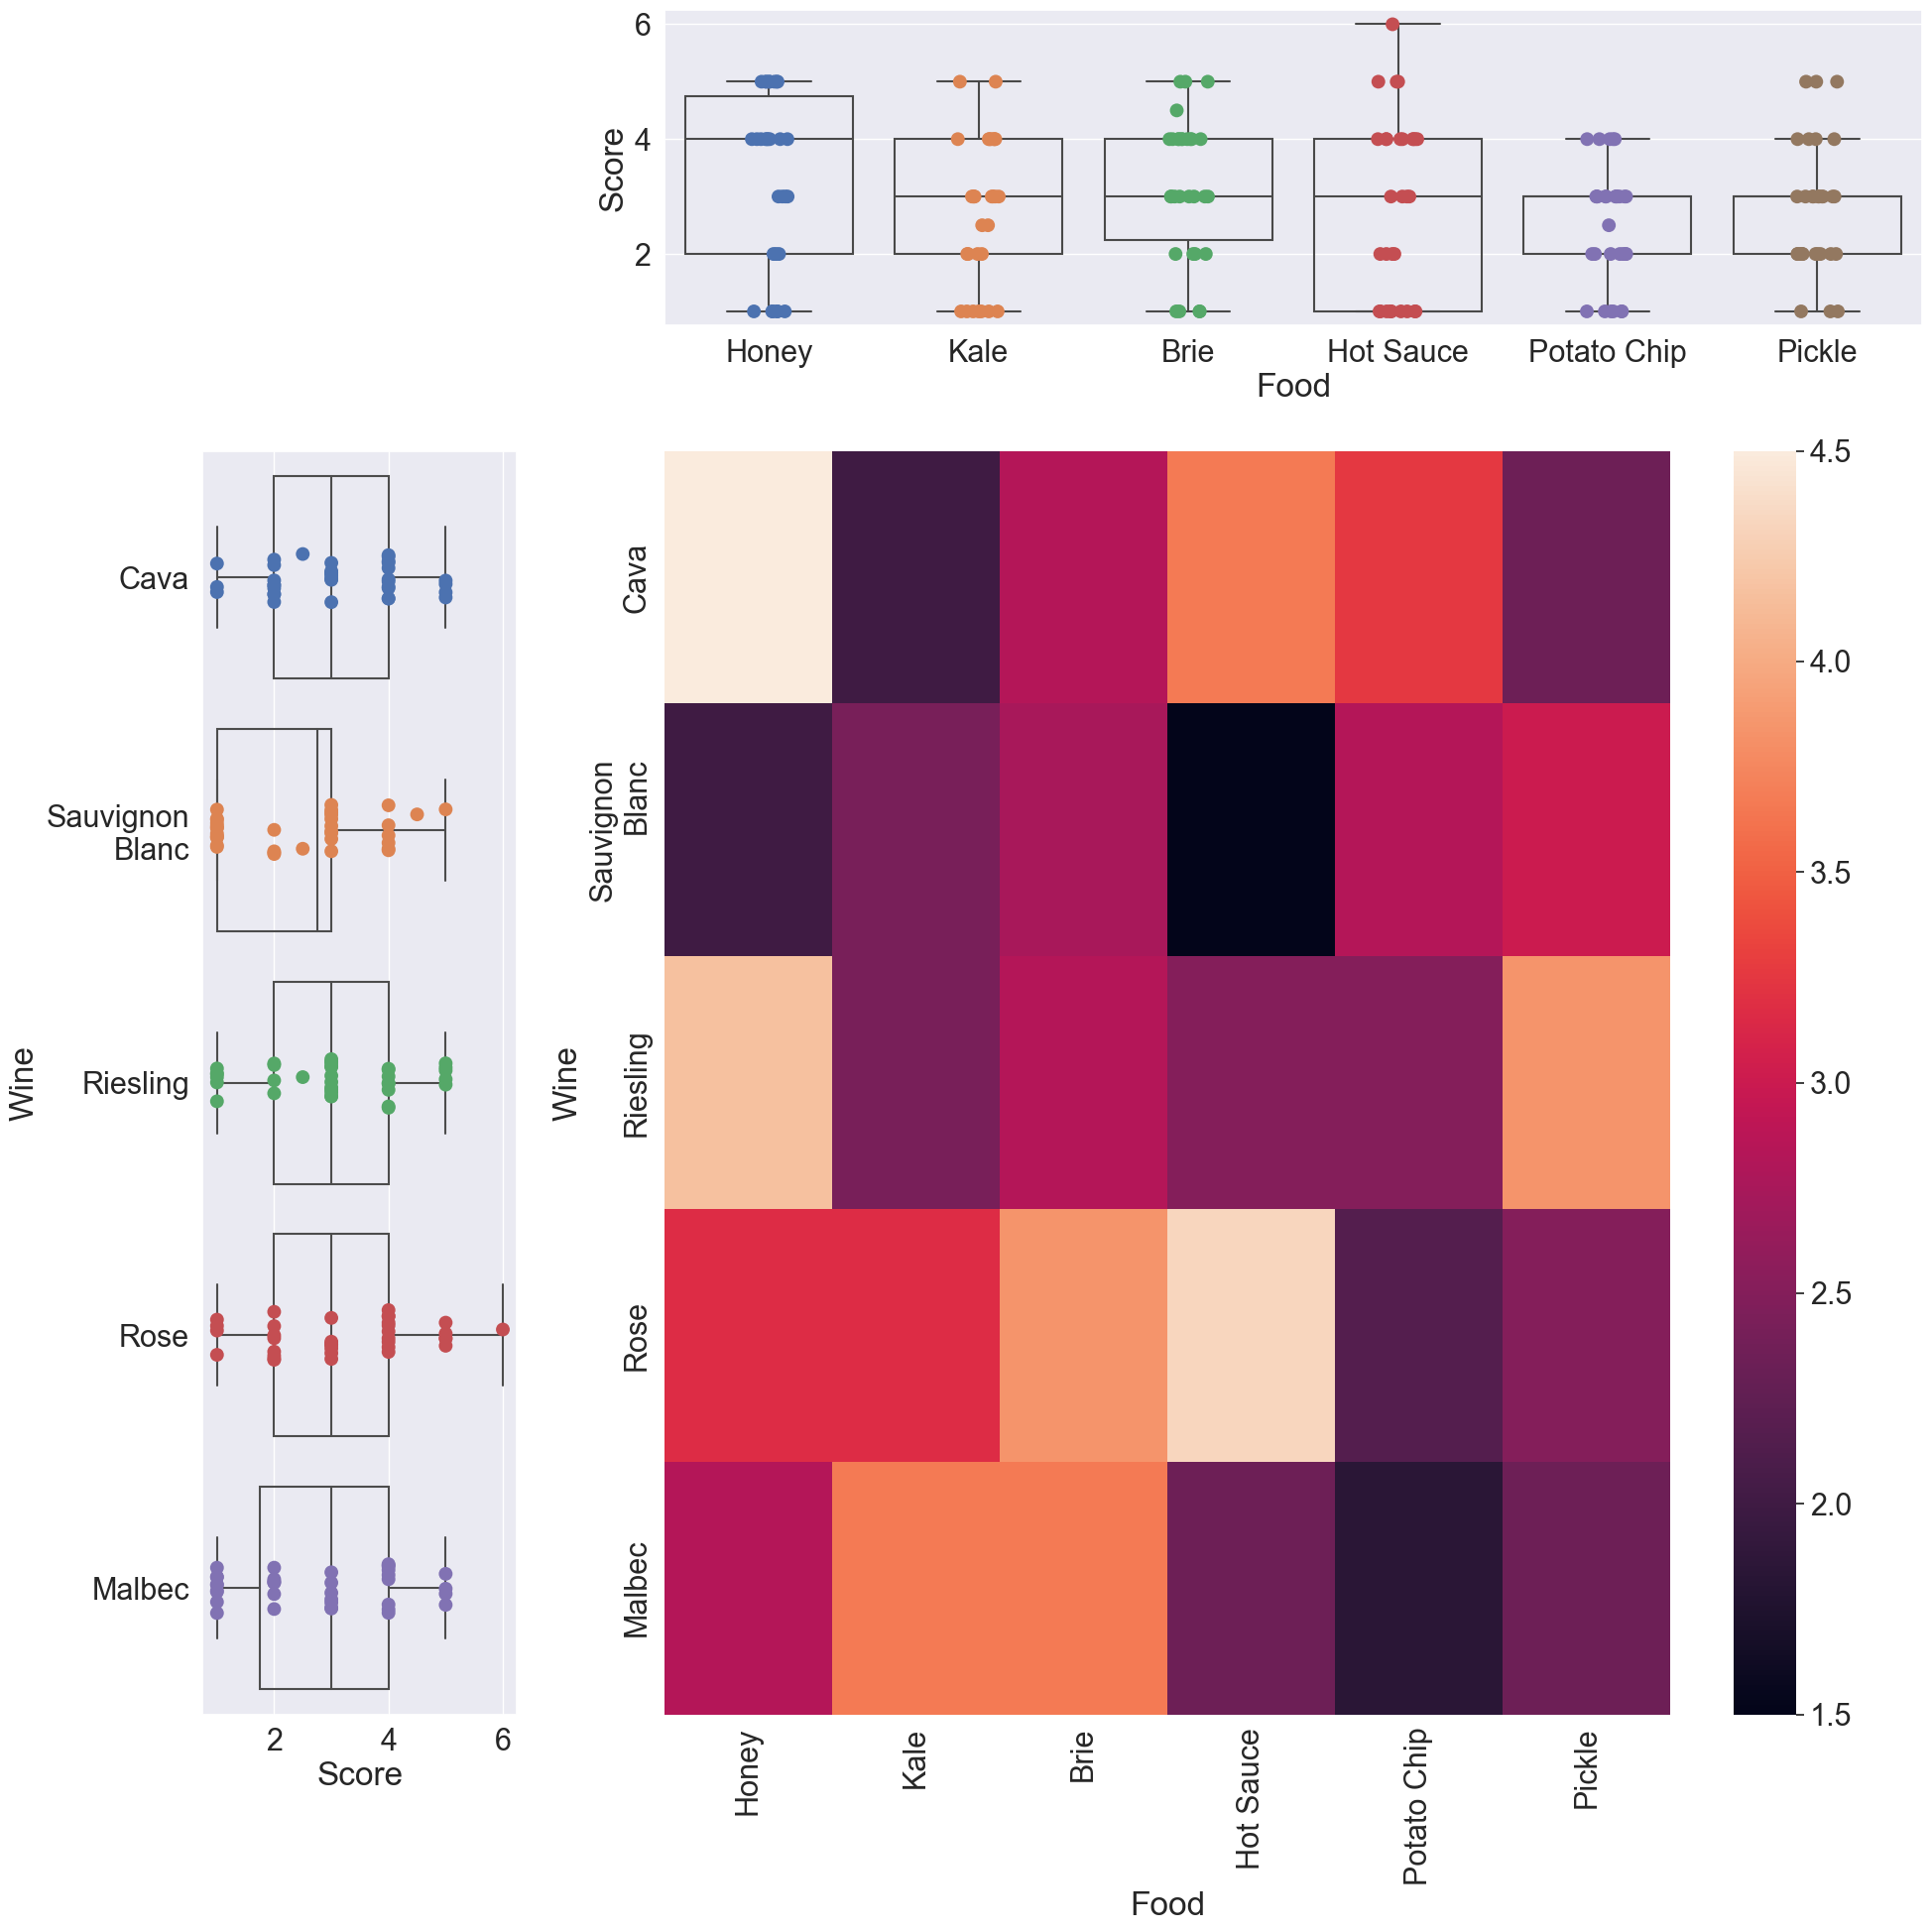

In [17]:
sns.set(font_scale=2)
f, axs = plt.subplots(2,2, figsize=(20,20), gridspec_kw={'width_ratios': [1, 4],'height_ratios': [1, 4]})

df_noname = df[["Wine", "Food", "Score"]]
av_score = df_noname.groupby(["Wine", "Food"]).mean()["Score"].to_frame().reset_index()
table = av_score.pivot(index="Wine", columns="Food", values="Score")
table = table.reindex(wines)
table = table[foods]

PROPS = {
    'boxprops':{'facecolor':'none'},
}

sns.boxplot(data=df, x="Food", y="Score", ax=axs[0,1], **PROPS)
sns.boxplot(data=df, x="Score", y="Wine", ax=axs[1,0], **PROPS)
sns.stripplot(data=df, x="Food", y="Score", hue="Food", ax=axs[0,1], legend=False, size=10)
sns.stripplot(data=df, x="Score", y="Wine", hue="Wine", ax=axs[1,0], legend=False, size=10)
sns.heatmap(table, ax=axs[1,1])

axs[0,0].axis('off')

f.tight_layout()

## Principles

In [18]:
def order_test(df_subset, order):
    list_data = df_subset.to_numpy()
    k = 0
    n = 0

    for i in range(list_data.shape[0]):
        for j in range(i+1,list_data.shape[0]):
            entry1 = list_data[i,:]
            qual_idx1 = order.index(entry1[1])
            entry2 = list_data[j,:]
            qual_idx2 = order.index(entry2[1])
            if qual_idx1 > qual_idx2: # first entry has more "discordant" quality
                n += 1
                if entry1[3] >= entry2[3]: # first entry is rated at least as high
                    k += 1
            elif qual_idx1 < qual_idx2: # second entry has more "discordant" quality
                n += 1
                if entry1[3] <= entry2[3]: # second entry is rated at least as high
                    k += 1

    return binom.cdf(k, n, 0.5) 

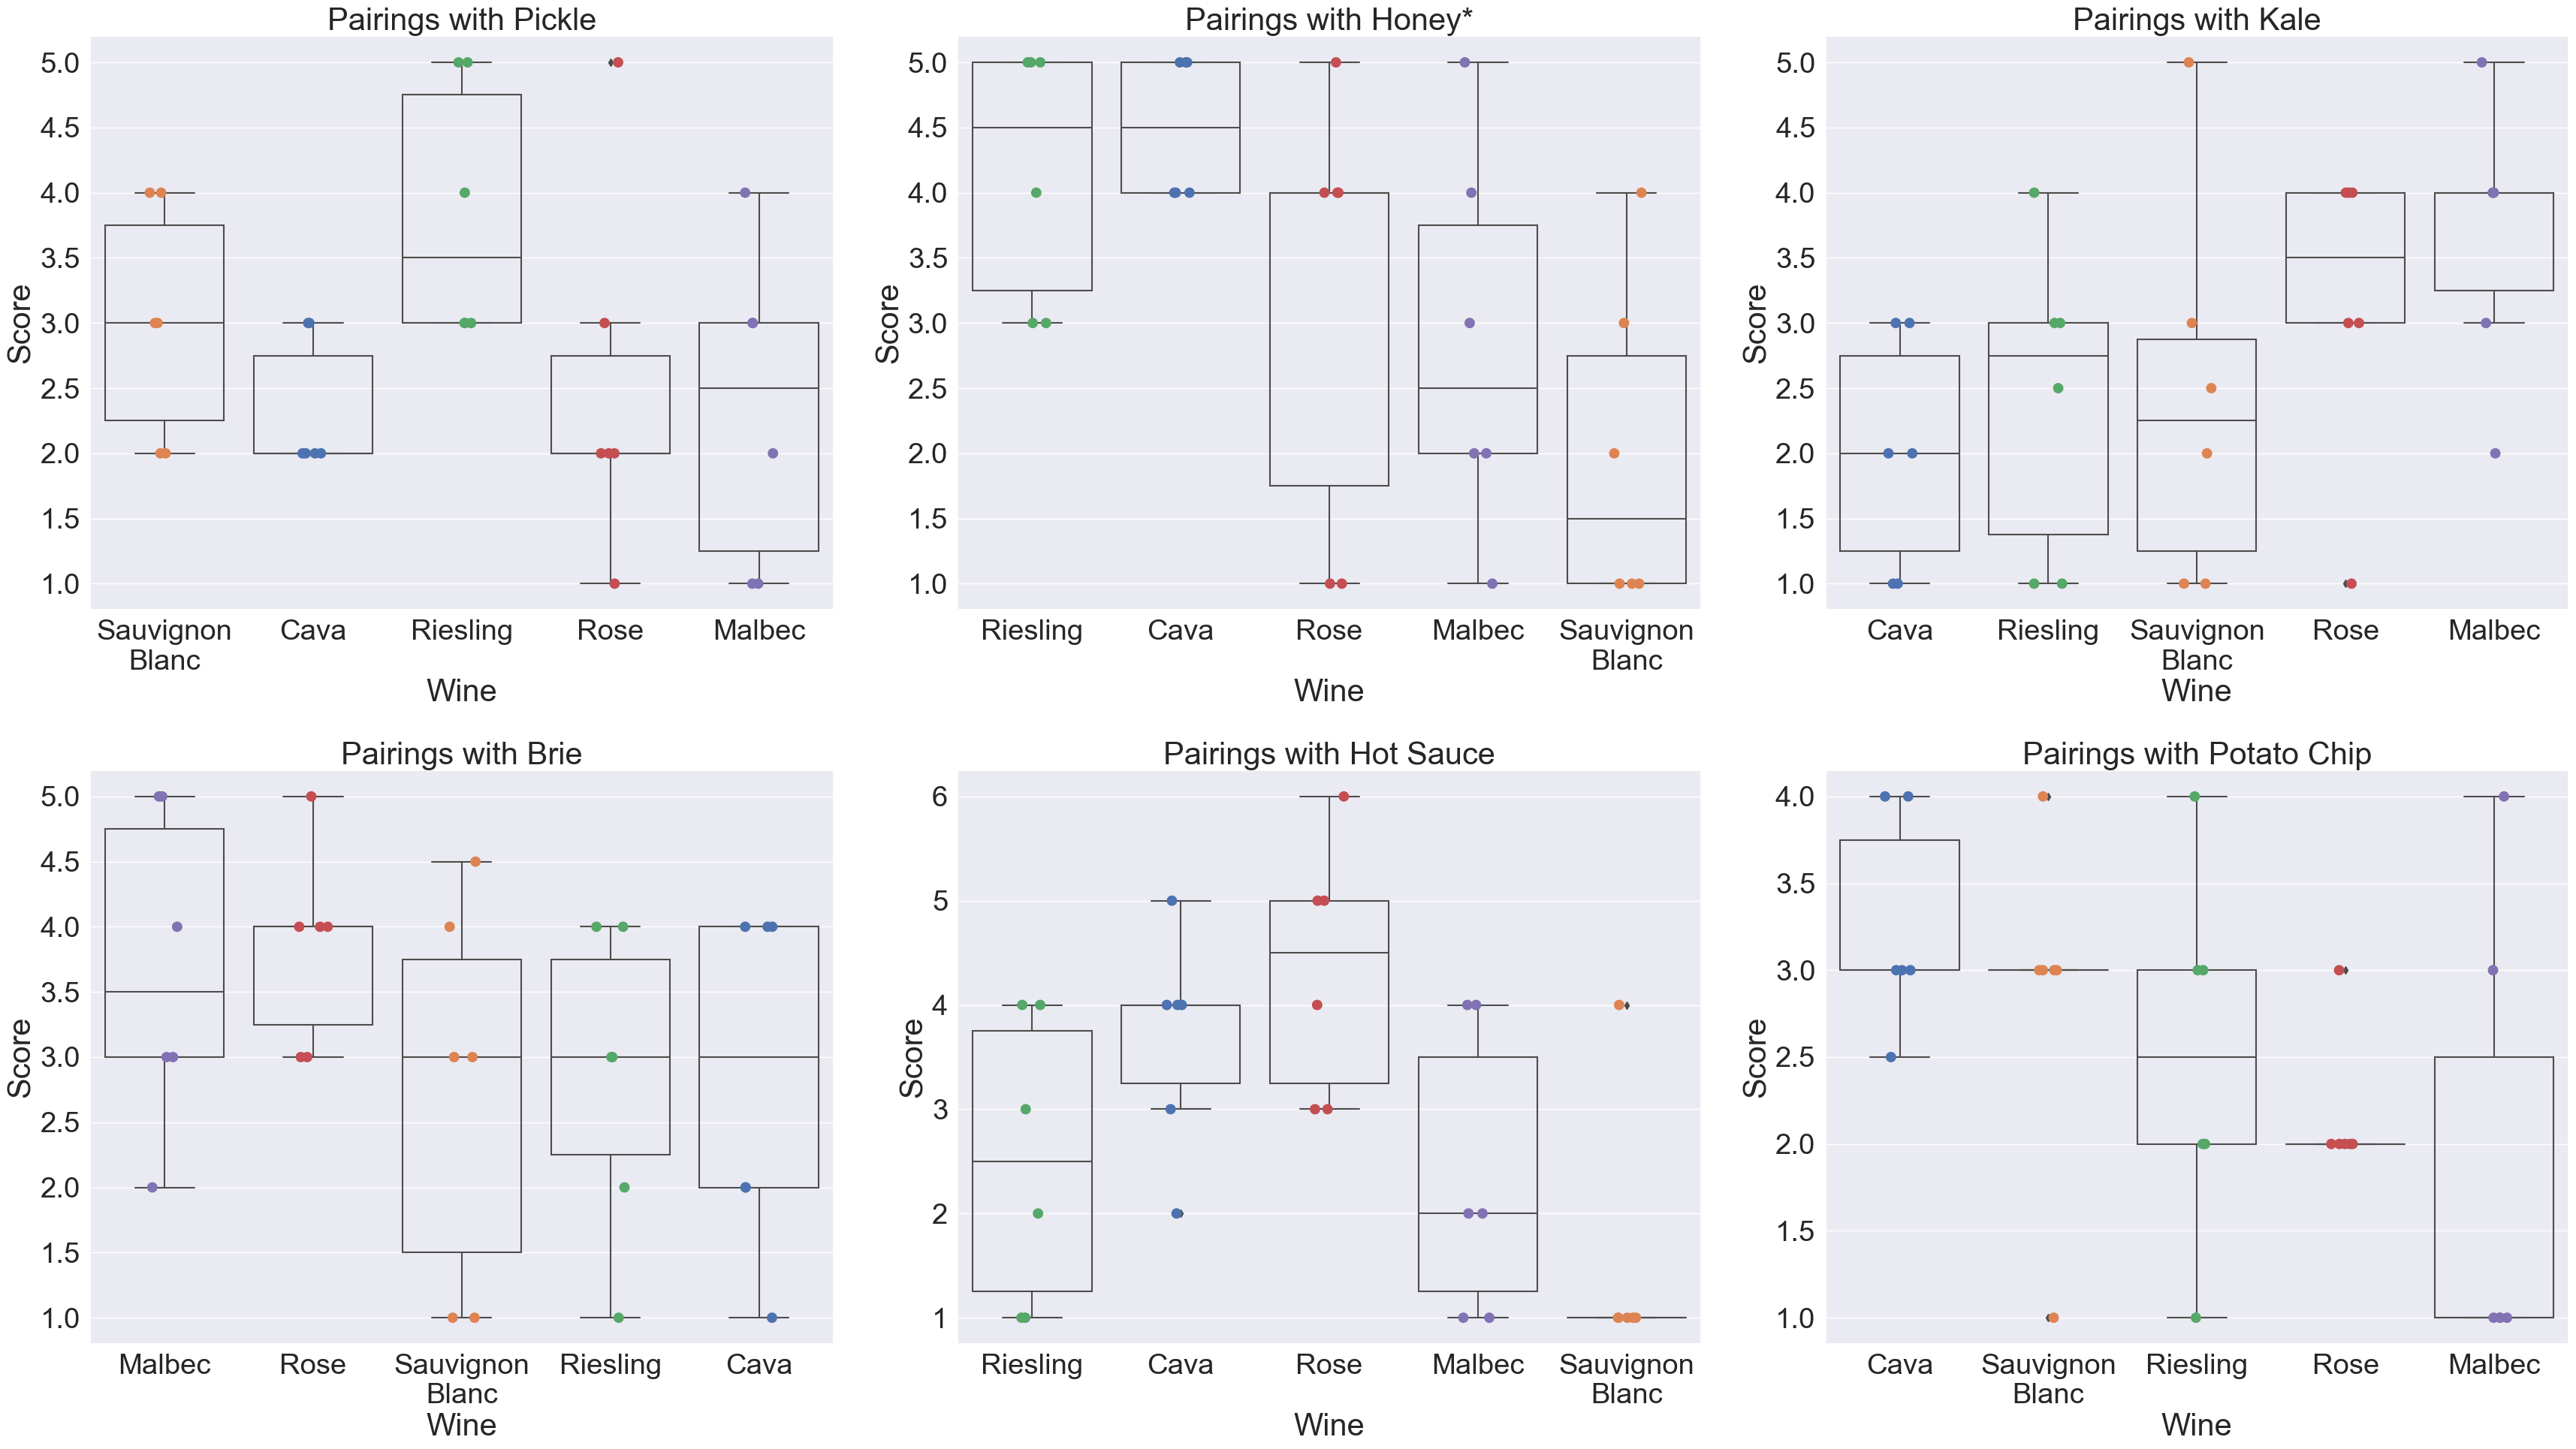

In [21]:
from pandas.api.types import CategoricalDtype

sns.set(font_scale=2.5)
f, axs = plt.subplots(2,3, figsize=(35,20))

df_subset = df[df["Food"] == "Pickle"]
order = ["Sauvignon\nBlanc", "Cava", "Riesling", "Rose", "Malbec"]
p = order_test(df_subset, order)
sns.boxplot(data=df_subset, x="Wine", y="Score", ax=axs[0,0], order=order, **PROPS)
sns.stripplot(data=df_subset, x="Wine", y="Score", hue="Wine", ax=axs[0,0], legend=False, size=10, order=order)

# cat_size_order = CategoricalDtype(
#     order, 
#     ordered=True
# )
# df_subset["Wine"] = df_subset["Wine"].astype(cat_size_order)
# df.sort_values('Wine')
# sns.lineplot(data=df_subset, x="Wine", y="Score", hue="Name", ax=axs[0,0])

if p < 0.01:
    sig = "*"
else:
    sig = ""
axs[0,0].set_title(f"Pairings with Pickle{sig}")

df_subset = df[df["Food"] == "Honey"]
order = ["Riesling", "Cava", "Rose", "Malbec", "Sauvignon\nBlanc"]
p = order_test(df_subset, order)
sns.boxplot(data=df_subset, x="Wine", y="Score", ax=axs[0,1], order=order, **PROPS)
sns.stripplot(data=df_subset, x="Wine", y="Score", hue="Wine", ax=axs[0,1], legend=False, size=10, order=order)

# cat_size_order = CategoricalDtype(
#     order, 
#     ordered=True
# )
# df_subset["Wine"] = df_subset["Wine"].astype(cat_size_order)
# df.sort_values('Wine')
# sns.lineplot(data=df_subset, x="Wine", y="Score", hue="Name", ax=axs[0,1])

if p < 0.01:
    sig = "*"
else:
    sig = ""
axs[0,1].set_title(f"Pairings with Honey{sig}")

df_subset = df[df["Food"] == "Kale"]
order = ["Cava", "Riesling", "Sauvignon\nBlanc", "Rose", "Malbec"]
p = order_test(df_subset, order)
sns.boxplot(data=df_subset, x="Wine", y="Score", ax=axs[0,2], order=order, **PROPS)
sns.stripplot(data=df_subset, x="Wine", y="Score", hue="Wine", ax=axs[0,2], legend=False, size=10, order=order)

# cat_size_order = CategoricalDtype(
#     order, 
#     ordered=True
# )
# df_subset["Wine"] = df_subset["Wine"].astype(cat_size_order)
# df.sort_values('Wine')
# sns.lineplot(data=df_subset, x="Wine", y="Score", hue="Name", ax=axs[0,2])

if p < 0.01:
    sig = "*"
else:
    sig = ""
axs[0,2].set_title(f"Pairings with Kale{sig}")

df_subset = df[df["Food"] == "Brie"]
order = ["Malbec", "Rose", "Sauvignon\nBlanc", "Riesling", "Cava"]
p = order_test(df_subset, order)
sns.boxplot(data=df_subset, x="Wine", y="Score", ax=axs[1,0], order=order, **PROPS)
sns.stripplot(data=df_subset, x="Wine", y="Score", hue="Wine", ax=axs[1,0], legend=False, size=10, order=order)

# cat_size_order = CategoricalDtype(
#     order, 
#     ordered=True
# )
# df_subset["Wine"] = df_subset["Wine"].astype(cat_size_order)
# df.sort_values('Wine')
# sns.lineplot(data=df_subset, x="Wine", y="Score", hue="Name", ax=axs[1,0])

if p < 0.01:
    sig = "*"
else:
    sig = ""
axs[1,0].set_title(f"Pairings with Brie{sig}")

df_subset = df[df["Food"] == "Hot Sauce"]
order = ["Riesling", "Cava", "Rose", "Malbec", "Sauvignon\nBlanc"]
p = order_test(df_subset, order)
sns.boxplot(data=df_subset, x="Wine", y="Score", ax=axs[1,1], order=order, **PROPS)
sns.stripplot(data=df_subset, x="Wine", y="Score", hue="Wine", ax=axs[1,1], legend=False, size=10, order=order)

# cat_size_order = CategoricalDtype(
#     order, 
#     ordered=True
# )
# df_subset["Wine"] = df_subset["Wine"].astype(cat_size_order)
# df.sort_values('Wine')
# sns.lineplot(data=df_subset, x="Wine", y="Score", hue="Name", ax=axs[1,1])

if p < 0.01:
    sig = "*"
else:
    sig = ""
axs[1,1].set_title(f"Pairings with Hot Sauce{sig}")

df_subset = df[df["Food"] == "Potato Chip"]
order = wines
sns.boxplot(data=df_subset, x="Wine", y="Score", ax=axs[1,2], order=order, **PROPS)
sns.stripplot(data=df_subset, x="Wine", y="Score", hue="Wine", ax=axs[1,2], legend=False, size=10, order=order)

# cat_size_order = CategoricalDtype(
#     order, 
#     ordered=True
# )
# df_subset["Wine"] = df_subset["Wine"].astype(cat_size_order)
# df.sort_values('Wine')
# sns.lineplot(data=df_subset, x="Wine", y="Score", hue="Name", ax=axs[1,2])

axs[1,2].set_title(f"Pairings with Potato Chip")

f.tight_layout()

## Clustering

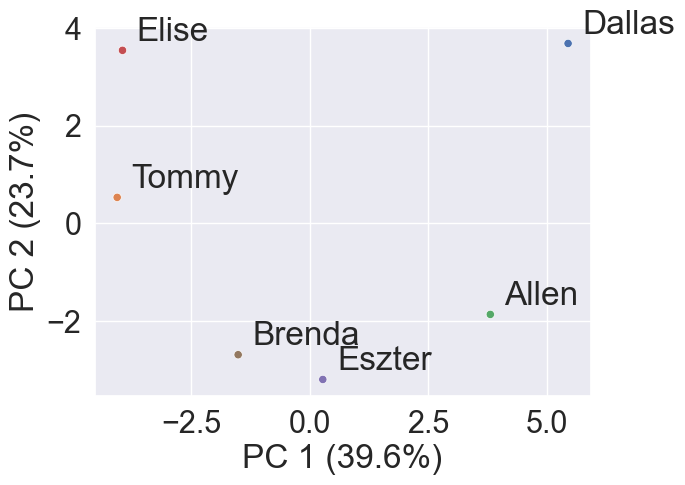

In [13]:
data = np.array([dallas, tommy, allen, elise, eszter, brenda])

pca = PCA(n_components=2)
components = pca.fit_transform(data)
labels = [f"PC {i+1} ({var:.1f}%)" for i, var in enumerate(pca.explained_variance_ratio_ * 100)]

df_pca = pd.DataFrame(components, columns = labels)

names = ["Dallas", "Tommy", "Allen", "Elise", "Eszter", "Brenda"]
df_pca["Name"] = names

# sns.pairplot(df_pca, hue="Name", diag_kind='hist', diag_kws = {'binwidth': 0.5})
sns.scatterplot(data=df_pca, x=labels[0], y=labels[1], hue="Name", legend=False)


name = df_pca["Name"]
pc1 = df_pca[labels[0]]
pc2 = df_pca[labels[1]]
for i, language in enumerate(name):
    plt.annotate(language, (pc1[i]+0.3, pc2[i]+0.2) )


In [22]:
components

array([[ 5.45572389,  3.68054614],
       [-4.0702773 ,  0.53048804],
       [ 3.81295456, -1.86487969],
       [-3.95773552,  3.53955662],
       [ 0.27382697, -3.19593075],
       [-1.5144926 , -2.68978036]])